In [1]:
!pip install chardet konlpy

import chardet
import pandas as pd
from google.colab import files
from konlpy.tag import Okt

# 1) 파일 업로드
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 2) 인코딩 자동 감지
with open(filename, 'rb') as f:
    raw = f.read()

enc = chardet.detect(raw)['encoding']
print("Detected encoding:", enc)

# 3) 텍스트 읽기
with open(filename, 'r', encoding=enc, errors='ignore') as f:
    text = f.read()

# 4) 형태소 분석기 준비
okt = Okt()

# 5) 형태소 + 품사 태깅 (stem=True: 동사/형용사 원형으로)
morphs = okt.pos(text, stem=True)

# 6) 내용어만 추출 (명사, 동사, 형용사)
content_pos = ['Noun', 'Verb', 'Adjective']
content_words = [w for w, p in morphs if p in content_pos]

# 7) 중복 제거 + 정렬
unique_words = sorted(list(set(content_words)))

# 8) 데이터프레임 저장
df_words = pd.DataFrame({'word': unique_words})
df_words.to_csv('words_content_okt.csv', index=False, encoding='utf-8-sig')

df_words.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 20.4 MB/s eta 0:00:00


Saving doc10.txt to doc10.txt
Detected encoding: utf-8


,word
0,가운데
1,같다
2,개
3,검토
4,것


In [3]:
import pandas as pd

# 1) 합칠 파일 리스트 (네가 실제 사용하는 파일명으로 수정하면 됨)
files = [
    "words_content_페드로_문예사조의이해.csv",
    "words_content_경제뉴스.csv",
    "words_content_뉴스.csv",
    "words_content_수업자료_중남미경제.csv",
    "words_content_뉴스 (2).csv"
]

dfs = [pd.read_csv(f, encoding="utf-8-sig") for f in files]

# 2) 하나의 큰 데이터프레임으로 합치기
df_all = pd.concat(dfs, ignore_index=True)

print("합친 후 전체 row 수:", len(df_all))
df_all.head()

# 일단 같은 (word, label) 조합 중 완전히 중복된 행 제거
df_all = df_all.drop_duplicates()

print("완전 중복 제거 후 row 수:", len(df_all))

# 같은 단어가 여러 번 등장할 수 있으니 word 기준으로 묶기
# 0이 한 번이라도 있으면 min() = 0, 전부 1이면 min() = 1
df_final = df_all.groupby("word", as_index=False)["label"].min()

print("최종 단어 수:", len(df_final))
df_final.head()

df_final.to_csv("word_labels_final.csv", index=False, encoding="utf-8-sig")
print("word_labels_final.csv 저장 완료!")


합친 후 전체 row 수: 1570
완전 중복 제거 후 row 수: 1334
최종 단어 수: 1244
word_labels_final.csv 저장 완료!


Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
전체 단어 수: 1244

0/1 분포:
label
1.0    945
0.0    202
Name: count, dtype: int64

label별 평균 길이:
label
0.0    2.366337
1.0    2.219048
Name: length, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


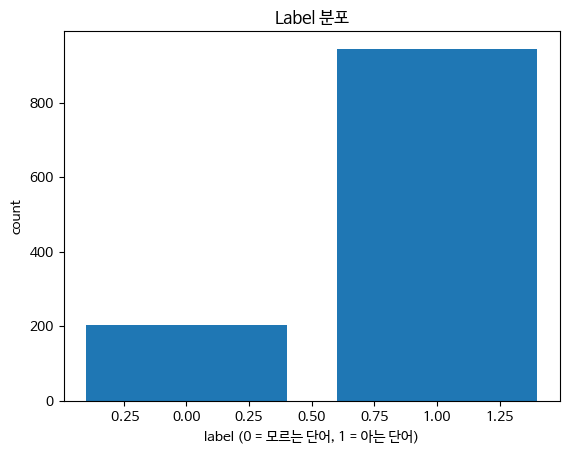

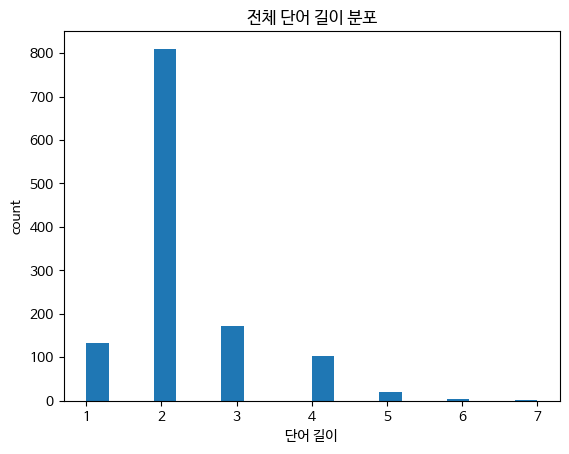

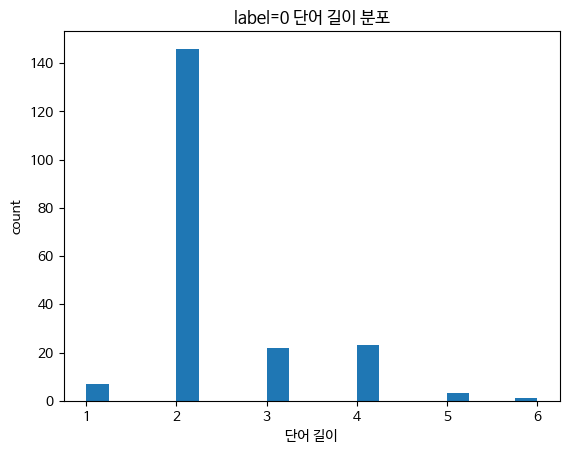

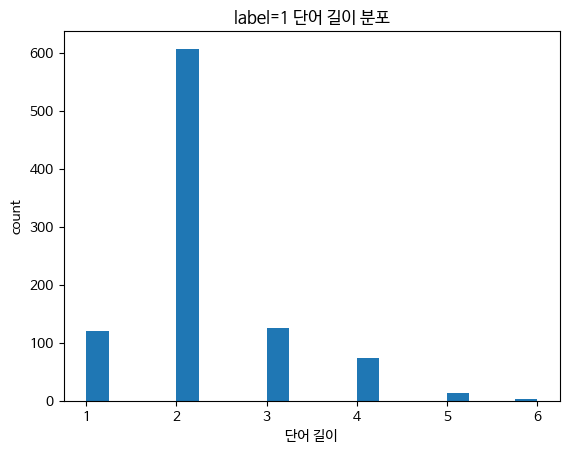

In [4]:
!apt-get -qq install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumBarunGothic'

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("word_labels_final.csv", encoding="utf-8-sig")

# 단어 길이 추가
df["length"] = df["word"].apply(len)

print("전체 단어 수:", len(df))
print("\n0/1 분포:")
print(df["label"].value_counts())

print("\nlabel별 평균 길이:")
print(df.groupby("label")["length"].mean())

# 1. label 분포 그래프
plt.bar(df["label"].value_counts().index, df["label"].value_counts().values)
plt.xlabel("label (0 = 모르는 단어, 1 = 아는 단어)")
plt.ylabel("count")
plt.title("Label 분포")
plt.show()

# 2. 전체 단어 길이 히스토그램
plt.hist(df["length"], bins=20)
plt.xlabel("단어 길이")
plt.ylabel("count")
plt.title("전체 단어 길이 분포")
plt.show()

# 3. label별 단어 길이 분포
for lab in [0, 1]:
    subset = df[df["label"] == lab]
    plt.hist(subset["length"], bins=20)
    plt.xlabel("단어 길이")
    plt.ylabel("count")
    plt.title(f"label={lab} 단어 길이 분포")
    plt.show()



